##### Formative Assessment 5

*Problem 1.* Midwestern University has 1/3 of its students taking 9 credit hours, 1/3 taking 12 credit hours, and 1/3 taking 15 credit hours. If X represents the credit hours a student is taking, the distribution of X is p(x) = 1/3 for x = 9, 12, and 15.

List all samples of size n=2 that are possible (with replacement) from the population. Plot the μ_xbar = μ , and show that (σ_xbar)^2 = σ^2 / 2. 

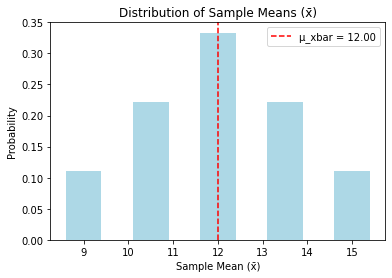

(11.999999999999998, 3.0000000000000284, 3.0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

credit_hours = [9, 12, 15]

samples = list(itertools.product(credit_hours, repeat=2))

means = [(x[0] + x[1]) / 2 for x in samples]

p_xbar = 1 / 9

unique_means = sorted(set(means))

p_means = [means.count(m) * p_xbar for m in unique_means]

mu_xbar = sum(m * p for m, p in zip(unique_means, p_means))

sigma_xbar_sq = sum(m**2 * p for m, p in zip(unique_means, p_means)) - mu_xbar**2

mu = np.mean(credit_hours)
sigma_sq = np.var(credit_hours)

plt.bar(unique_means, p_means, color='lightblue')
plt.axvline(mu_xbar, color='red', linestyle='--', label=f'μ_xbar = {mu_xbar:.2f}')
plt.title("Distribution of Sample Means (x̄)")
plt.xlabel("Sample Mean (x̄)")
plt.ylabel("Probability")
plt.legend()
plt.show()

mu_xbar, sigma_xbar_sq, sigma_sq / 2

In [2]:
import pandas as pd
import itertools

credit_hours = [9, 12, 15]

samples = list(itertools.product(credit_hours, repeat=2))

means = [(x[0] + x[1]) / 2 for x in samples]

p_xbar = 1 / 9

unique_means = sorted(set(means))

p_means = [means.count(m) * p_xbar for m in unique_means]

data = {
    'A': [x[0] for x in samples],
    'B': [x[1] for x in samples],
    'C': means,
    'mean_xbar': means,
    'p(xbar)': [p_means[unique_means.index(m)] for m in means],
}

df = pd.DataFrame(data)

xbar_p_xbar = []
xbar2_p_xbar = []

for index, row in df.iterrows():
    mean_xbar = row['mean_xbar']
    p_xbar = row['p(xbar)']
    xbar_p_xbar.append(mean_xbar * p_xbar)
    xbar2_p_xbar.append((mean_xbar ** 2) * p_xbar)

df['xbar*p(xbar)'] = xbar_p_xbar
df['xbar^2*p(xbar)'] = xbar2_p_xbar

df

,A,B,C,mean_xbar,p(xbar),xbar*p(xbar),xbar^2*p(xbar)
0,9,9,9.0,9.0,0.111111,1.000000,9.0
1,9,12,10.5,10.5,0.222222,2.333333,24.5
2,9,15,12.0,12.0,0.333333,4.000000,48.0
3,12,9,10.5,10.5,0.222222,2.333333,24.5
4,12,12,12.0,12.0,0.333333,4.000000,48.0
5,12,15,13.5,13.5,0.222222,3.000000,40.5
6,15,9,12.0,12.0,0.333333,4.000000,48.0
7,15,12,13.5,13.5,0.222222,3.000000,40.5
8,15,15,15.0,15.0,0.111111,1.666667,25.0


*Problem 2.1* A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d ) the standard deviation of the sampling distribution of means. Verify parts (c) and (d ) directly from (a) and (b) by using suitable formulas.

In [3]:
population = [3, 7, 11, 15]

population_mean = np.mean(population)

population_std = np.std(population, ddof=0)  # Using population standard deviation (ddof=0)

samples = list(itertools.product(population, repeat=2))

sample_means = [np.mean(sample) for sample in samples]

mean_sampling_distribution = np.mean(sample_means)

std_sampling_distribution = np.std(sample_means, ddof=0)  # Using population standard deviation

# Verification using formulas
std_sampling_formula = population_std / np.sqrt(2)

data = {
    'Metric': ['Population Mean', 'Population Standard Deviation', 'Mean of Sampling Distribution', 
               'Standard Deviation of Sampling Distribution', 'Standard Error Formula'],
    'Value': [population_mean, population_std, mean_sampling_distribution, std_sampling_distribution, std_sampling_formula]
}

df = pd.DataFrame(data)

df

,Metric,Value
0,Population Mean,9.000000
1,Population Standard Deviation,4.472136
2,Mean of Sampling Distribution,9.000000
3,Standard Deviation of Sampling Distribution,3.162278
4,Standard Error Formula,3.162278


*Problem 2.2* Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and 57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and girls.

In [4]:
import scipy.stats as stats

n = 200
p_boy = 0.5
p_girl = 1 - p_boy

mean = n * p_boy
std_dev = (n * p_boy * (1 - p_boy)) ** 0.5

# (a) Probability that less than 40% will be boys
x_a = 0.40 * n
p_a = stats.norm.cdf(x_a, mean, std_dev)

# (b) Probability that between 43% and 57% will be girls
x_b1 = 0.43 * n
x_b2 = 0.57 * n
p_b = stats.norm.cdf(x_b2, mean, std_dev) - stats.norm.cdf(x_b1, mean, std_dev)

# (c) Probability that more than 54% will be boys
x_c = 0.54 * n
p_c = 1 - stats.norm.cdf(x_c, mean, std_dev)

data = {
    'Scenario': ['Less than 40% boys', 'Between 43% and 57% girls', 'More than 54% boys'],
    'Probability': [p_a, p_b, p_c]
}

df = pd.DataFrame(data)

df

,Scenario,Probability
0,Less than 40% boys,0.002339
1,Between 43% and 57% girls,0.952285
2,More than 54% boys,0.128950


*Problem 3.* The credit hour distribution at Metropolitan Technological College is as follows:

In [5]:
last = {'x' : [6, 9, 12, 15, 18],
       'p(x)' : [0.1, 0.2, 0.4, 0.2, 0.1]}

df3 = pd.DataFrame(last)
display(df3.transpose())

,0,1,2,3,4
x,6.0,9.0,12.0,15.0,18.0
p(x),0.1,0.2,0.4,0.2,0.1


Find 𝜇 and variance. Give the 25 (with replacement) possible samples of size 2, their means, and their probabilities.

In [6]:
from itertools import combinations

values = [6, 9, 9, 12, 12, 12, 12, 15, 15, 18]


mean = np.mean(values)
variance = np.var(values, ddof=0)  # Population variance

print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")

comb = combinations([6, 9, 9, 12, 12, 12, 12, 15, 15, 18],2)
x=1

totalvalues = []
total_six = 0
total_nine = 0
total_twelve = 0
total_fifteen = 0
total_eighteen = 0

for i in list(comb):
    
    p_six = i.count(6)
    p_nine = i.count(9)
    p_twelve = i.count(12)
    p_fifteen = i.count(15)
    p_eighteen = i.count(18)
    
    realprop_six= p_six/2
    tupe_six = (p_six/2,)
    i += tupe_six
    
    realprop_nine= p_nine/2
    tupe_nine = (p_nine/2,)
    i += tupe_nine
    
    realprop_twelve= p_twelve/2
    tupe_twelve = (p_twelve/2,)
    i += tupe_twelve
    
    realprop_fifteen= p_fifteen/2
    tupe_fifteen = (p_fifteen/2,)
    i += tupe_fifteen
    
    realprop_eighteen= p_eighteen/2
    tupe_eighteen = (p_eighteen/2,)
    i += tupe_eighteen
    
    total_six += realprop_six
    total_nine += realprop_nine
    total_twelve += realprop_twelve
    total_fifteen += realprop_fifteen
    total_eighteen += realprop_eighteen
    
    totalvalues.append(i)
    x+=1

samp_distrib = x-1

df4 = pd.DataFrame(totalvalues, columns=['1st Pick', '2nd Pick', 'p_6', 'p_9','p_12','p_15','p_18'])
display(df4.head(25))

ave_six = total_six/samp_distrib
ave_nine = total_nine/samp_distrib
ave_twelve = total_twelve/samp_distrib
ave_fifteen = total_fifteen/samp_distrib
ave_eighteen = total_eighteen/samp_distrib

print(f"Average Proportion of 6: {ave_six:.2f}")
print(f"Average Proportion of 9: {ave_nine:.2f}")
print(f"Average Proportion of 12: {ave_twelve:.2f}")
print(f"Average Proportion of 15: {ave_fifteen:.2f}")
print(f"Average Proportion of 18: {ave_eighteen:.2f}")

Mean: 12.00
Variance: 10.80


,1st Pick,2nd Pick,p_6,p_9,p_12,p_15,p_18
0,6,9,0.5,0.5,0.0,0.0,0.0
1,6,9,0.5,0.5,0.0,0.0,0.0
2,6,12,0.5,0.0,0.5,0.0,0.0
3,6,12,0.5,0.0,0.5,0.0,0.0
4,6,12,0.5,0.0,0.5,0.0,0.0
5,6,12,0.5,0.0,0.5,0.0,0.0
6,6,15,0.5,0.0,0.0,0.5,0.0
7,6,15,0.5,0.0,0.0,0.5,0.0
8,6,18,0.5,0.0,0.0,0.0,0.5
9,9,9,0.0,1.0,0.0,0.0,0.0


Average Proportion of 6: 0.10
Average Proportion of 9: 0.20
Average Proportion of 12: 0.40
Average Proportion of 15: 0.20
Average Proportion of 18: 0.10
